In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pickle


In [2]:
# Load and clean the dataset
ESR = pd.read_csv(r'C:\Users\hp\Downloads\epilepsy_eeg-main\epilepsy_eeg-main\csv_data\Epileptic Seizure Recognition.csv')

# Drop the first column (ID or unnamed) and ensure correct shape
ESR = ESR.drop(columns=ESR.columns[0])  # Drops unnamed first column
ESR['y'] = ESR['y'].apply(lambda x: 0 if x > 1 else 1)  # Binary target

# Final feature and label separation: Use only 177 EEG features
X = ESR.iloc[:, 0:177].values  # EEG signal features only
Y = ESR['y'].values


C:\Users\hp\AppData\Local\Temp\ipykernel_2308\250668089.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=ESR['y'], palette='Set2')


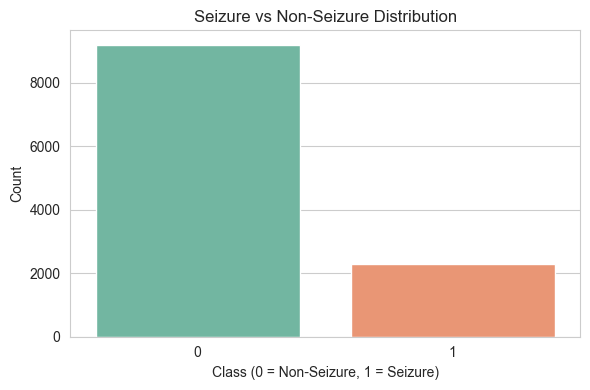

In [3]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(x=ESR['y'], palette='Set2')
plt.title('Seizure vs Non-Seizure Distribution')
plt.xlabel('Class (0 = Non-Seizure, 1 = Seizure)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


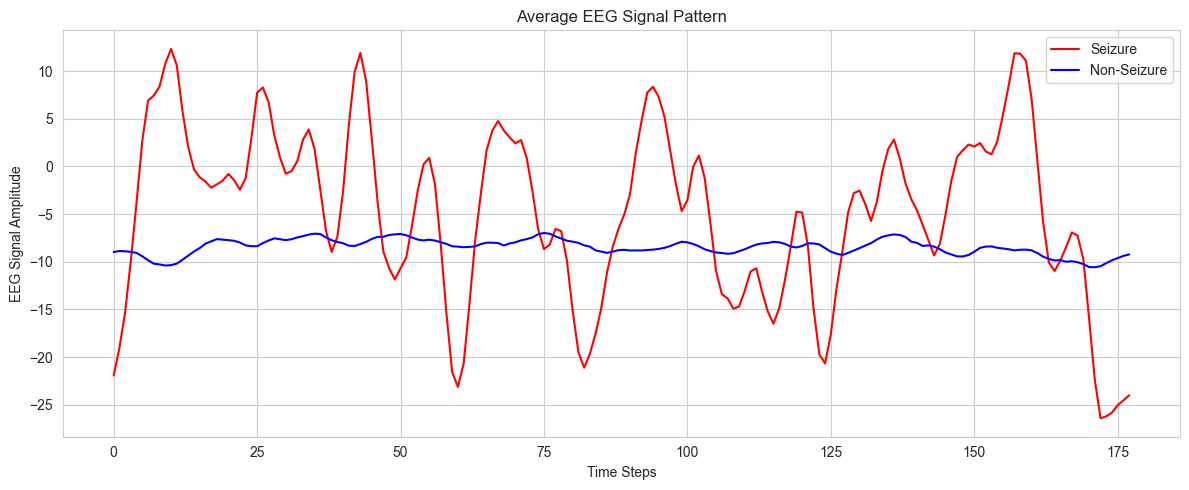

In [4]:
seizure_data = ESR[ESR['y'] == 1].iloc[:, :-1]
non_seizure_data = ESR[ESR['y'] == 0].iloc[:, :-1]
seizure_mean = seizure_data.mean()
non_seizure_mean = non_seizure_data.mean()

plt.figure(figsize=(12, 5))
plt.plot(seizure_mean.values, label='Seizure', color='red')
plt.plot(non_seizure_mean.values, label='Non-Seizure', color='blue')
plt.title("Average EEG Signal Pattern")
plt.xlabel("Time Steps")
plt.ylabel("EEG Signal Amplitude")
plt.legend()
plt.tight_layout()
plt.show()


In [5]:
X = ESR.iloc[:, :-1].values
Y = ESR.iloc[:, -1].values


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [7]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [8]:
clf = SVC(probability=True, kernel='rbf', C=1.0, gamma='scale', random_state=42)
clf.fit(X_train, y_train)


SVC(probability=True, random_state=42)

Accuracy is: 98.16%


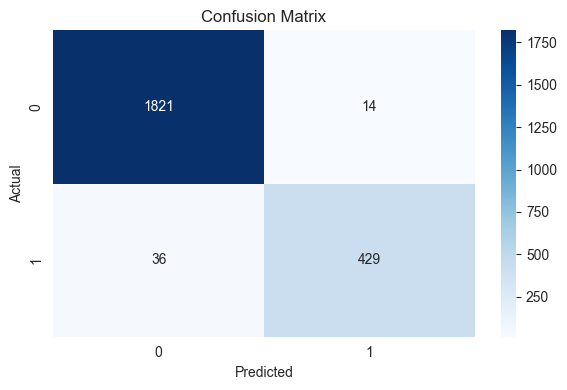

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1835
           1       0.97      0.92      0.94       465

    accuracy                           0.98      2300
   macro avg       0.97      0.96      0.97      2300
weighted avg       0.98      0.98      0.98      2300



In [9]:
y_pred_svc = clf.predict(X_test)
acc_svc = round(clf.score(X_train, y_train) * 100, 2)
print("Accuracy is:", str(acc_svc) + '%')

cm = confusion_matrix(y_test, y_pred_svc)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_svc))


In [10]:
# Extract and scale a sample
new_input1 = ESR.iloc[6, :-1].values.reshape(1, -1)
new_input1_scaled = sc.transform(new_input1)

# Predict and probability
new_output = clf.predict(new_input1_scaled)
new_prob = clf.predict_proba(new_input1_scaled)[0][1]

print("Predicted class:", new_output[0])
print("Probability of seizure:", round(new_prob * 100, 2), "%")

if new_output[0] == 1:
    print('"Yes" you might get a seizure, be conscious about it.')
else:
    print('You are safe, no worries :)')


Predicted class: 0
Probability of seizure: 0.83 %
You are safe, no worries :)


In [11]:
pickle.dump(clf, open(r'C:\Users\hp\Downloads\epilepsy_eeg-main\epilepsy_eeg-main\svm\svmmodel.pkl', 'wb'))
pickle.dump(sc, open(r'C:\Users\hp\Downloads\epilepsy_eeg-main\epilepsy_eeg-main\svm\scaler.pkl', 'wb'))
print("✅ Model and scaler saved successfully.")


✅ Model and scaler saved successfully.
